<a href="https://colab.research.google.com/github/elenisproject/NewsCleanser/blob/master/notebooks/popular_word_per_year.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# In this notebook we are going to Find the Most Commont Words per year
<br>
<font size="3">
First we need to import all the needed libraries for this project
<br>
We our going to use:

- matplotlib
- pandas
- wordcloud
- regex
    
*I find it very interesting to see what where the subjects that each year, the mass media had most of their attention.*
    </font>

In [ ]:
from matplotlib import pyplot as plt
import pandas as pd
import collections
from collections import Counter,defaultdict,OrderedDict,namedtuple 
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from datetime import datetime
import re

<br>
<font size="3">
After installing and importing everything we are going to need we will read our data from the output.csv file and create the basic function for combining words per year and ploting in word clouds and bar charts
</font>
<br>
<br>

In [ ]:

#read the data
df = pd.read_csv('output.csv')

#fill all null values in the table
df = df.fillna(" ")

#give the year of interest and return the 100 most popular words of the whole data 
def common_year(year):
    text0 = " "
    for row_index,row in df.iterrows():
        date = row['article_date']
        text = row['article_body']
        if re.search(r'\d\d\d\d',date).group(0) == year:
            text0 = text0 + text

    text_to_words = text0.split()
    top = Counter(text_to_words).most_common(100)
    return top


def plot_cloud(top,year):
    wordcloud = WordCloud(width=1600, height=800, background_color='white').generate(str(top))
    fig = plt.figure(figsize=(30,10), facecolor='white')
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.title('100 Most Common Words in the year '+year, fontsize=100)
    plt.tight_layout(pad=0)
    plt.show()

def plot_barchart(top,year):
    top = top[0:10]
    words = []
    count = []
    for values in top:
        words.append(values[0])
        count.append(values[1])

    plt.figure(figsize=(15, 5))
    plt.bar(words, count)
    plt.title('Bar chart for 10 most common words in '+year)
    plt.show()    

<br>
<font size="3">
Once finished with the above we are going to call our function and create our visualizations.
</font>
<br>
<br>

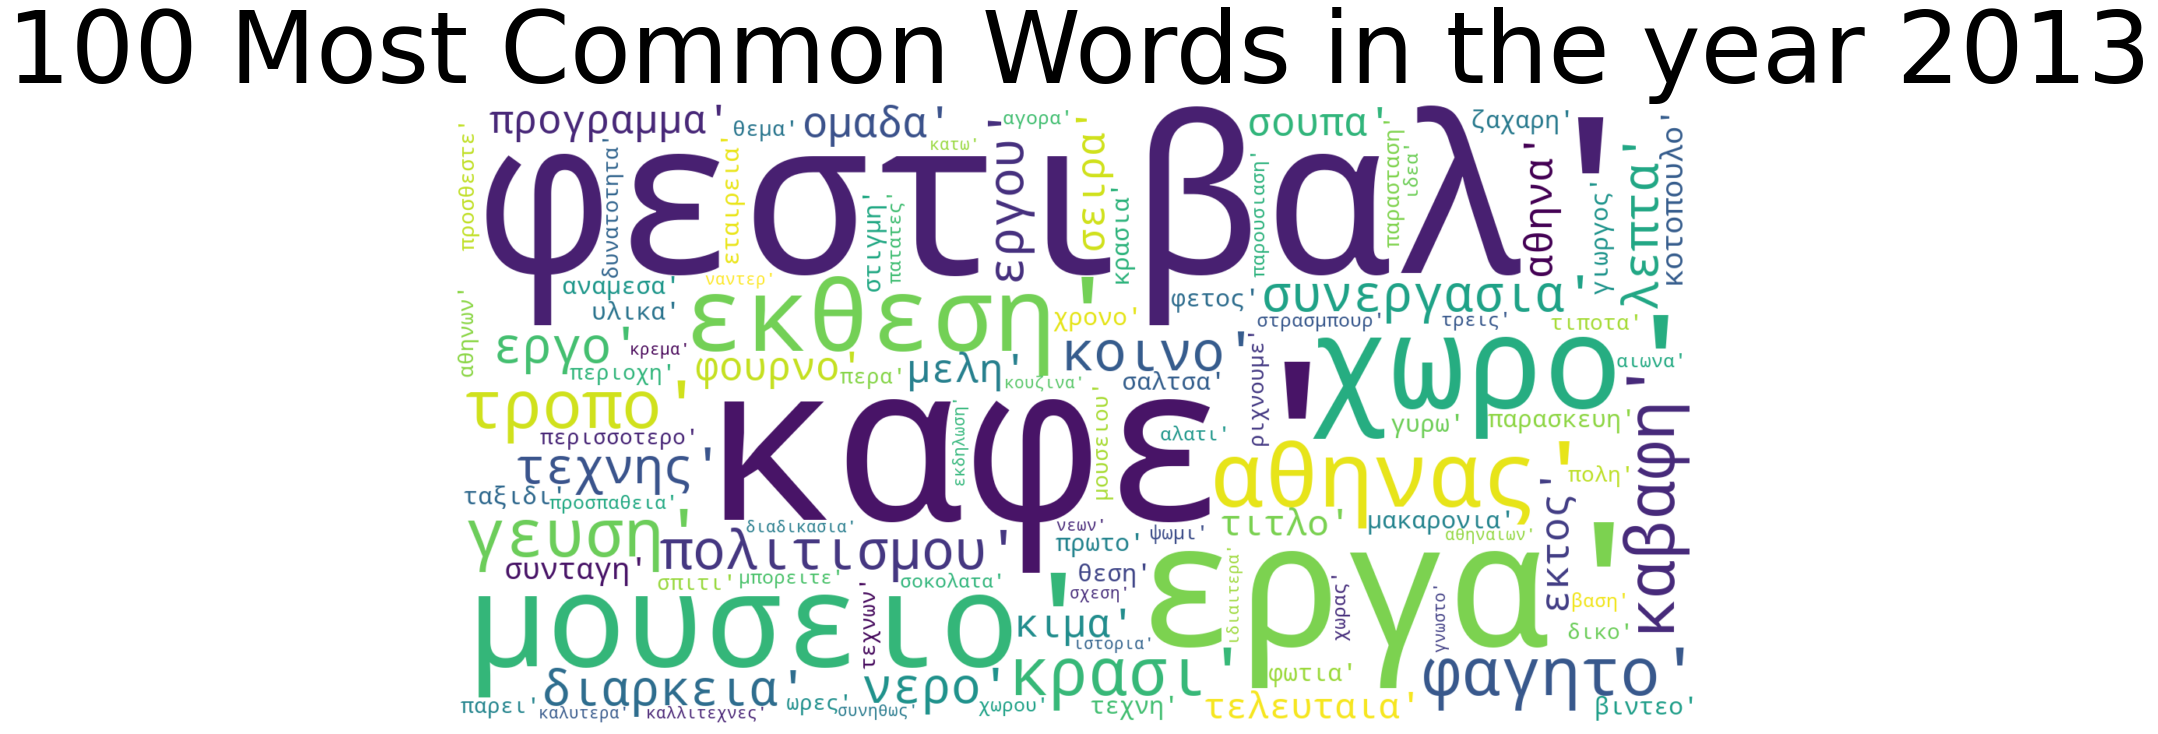

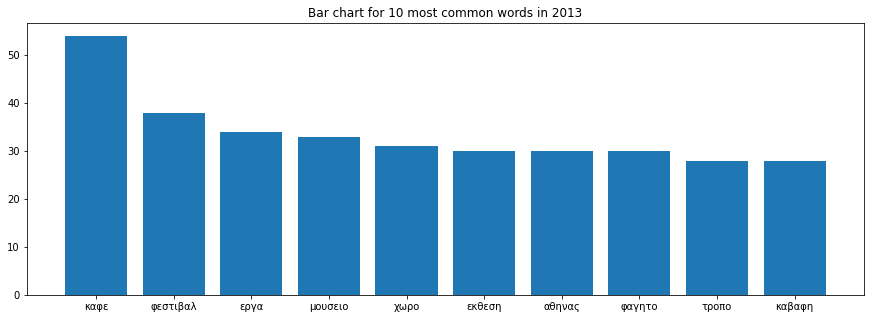

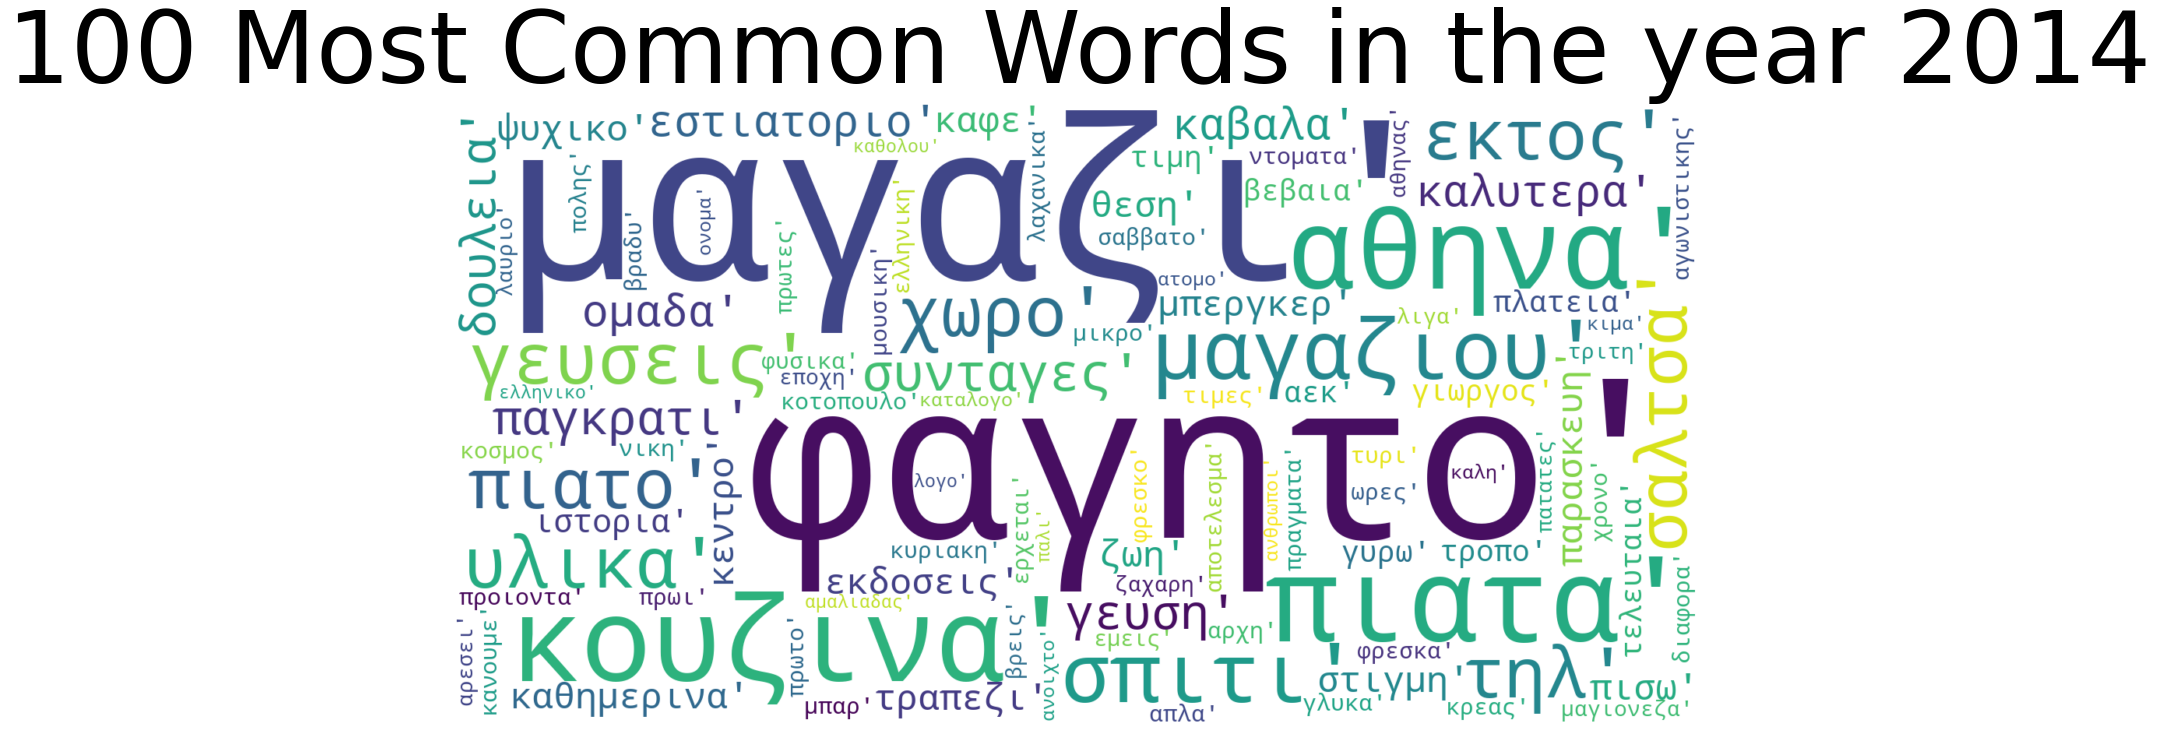

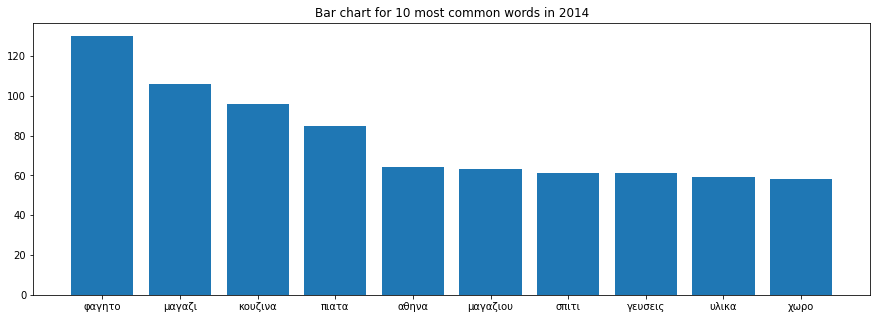

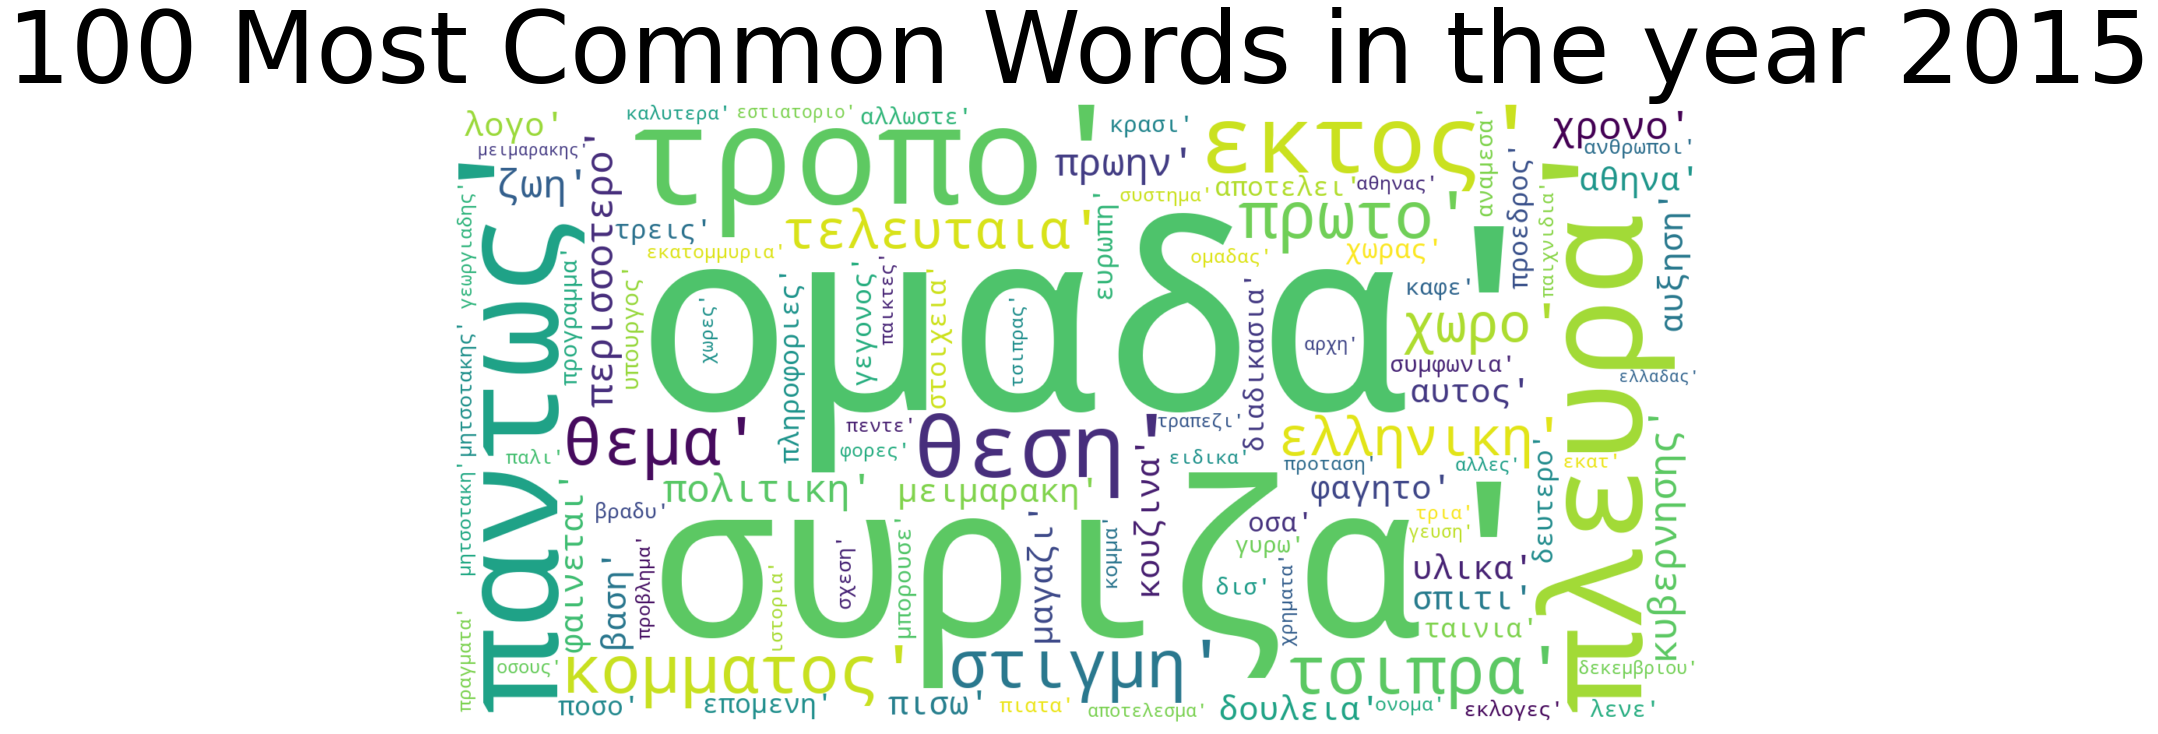

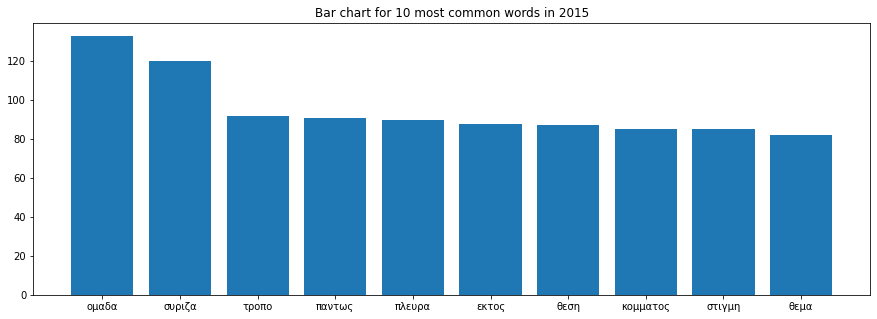

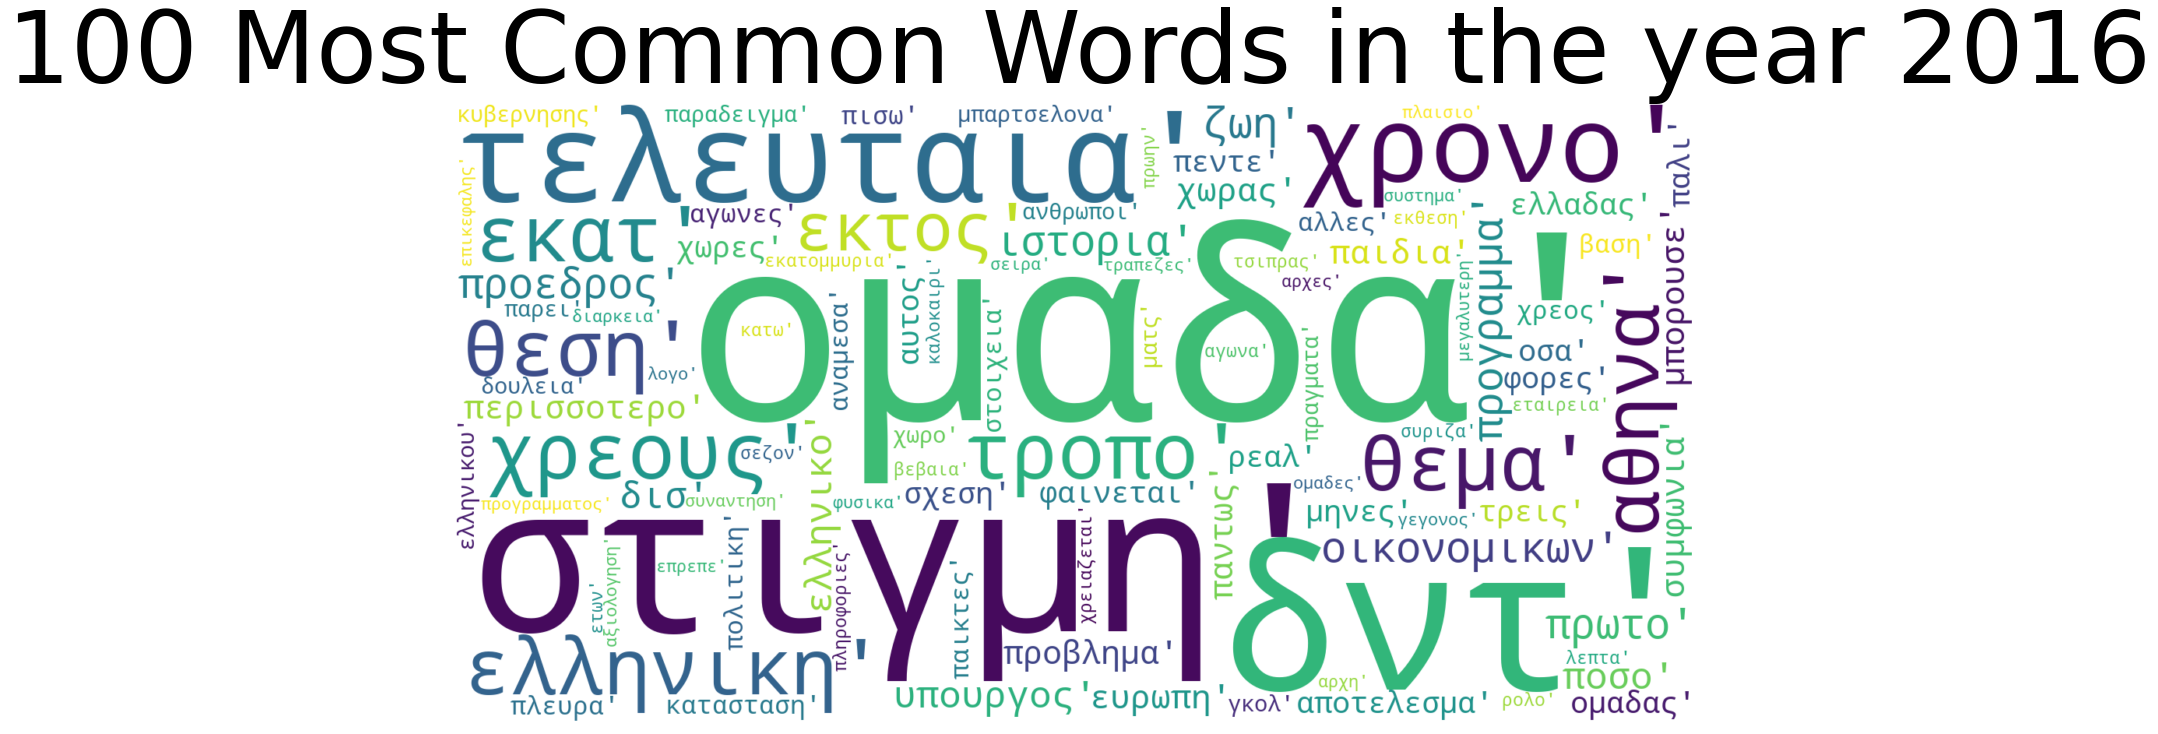

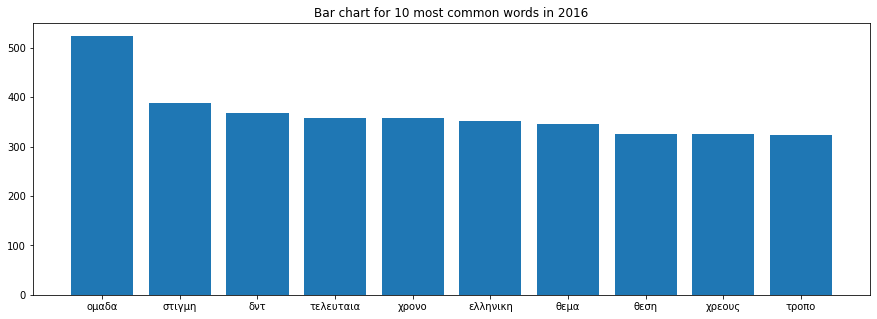

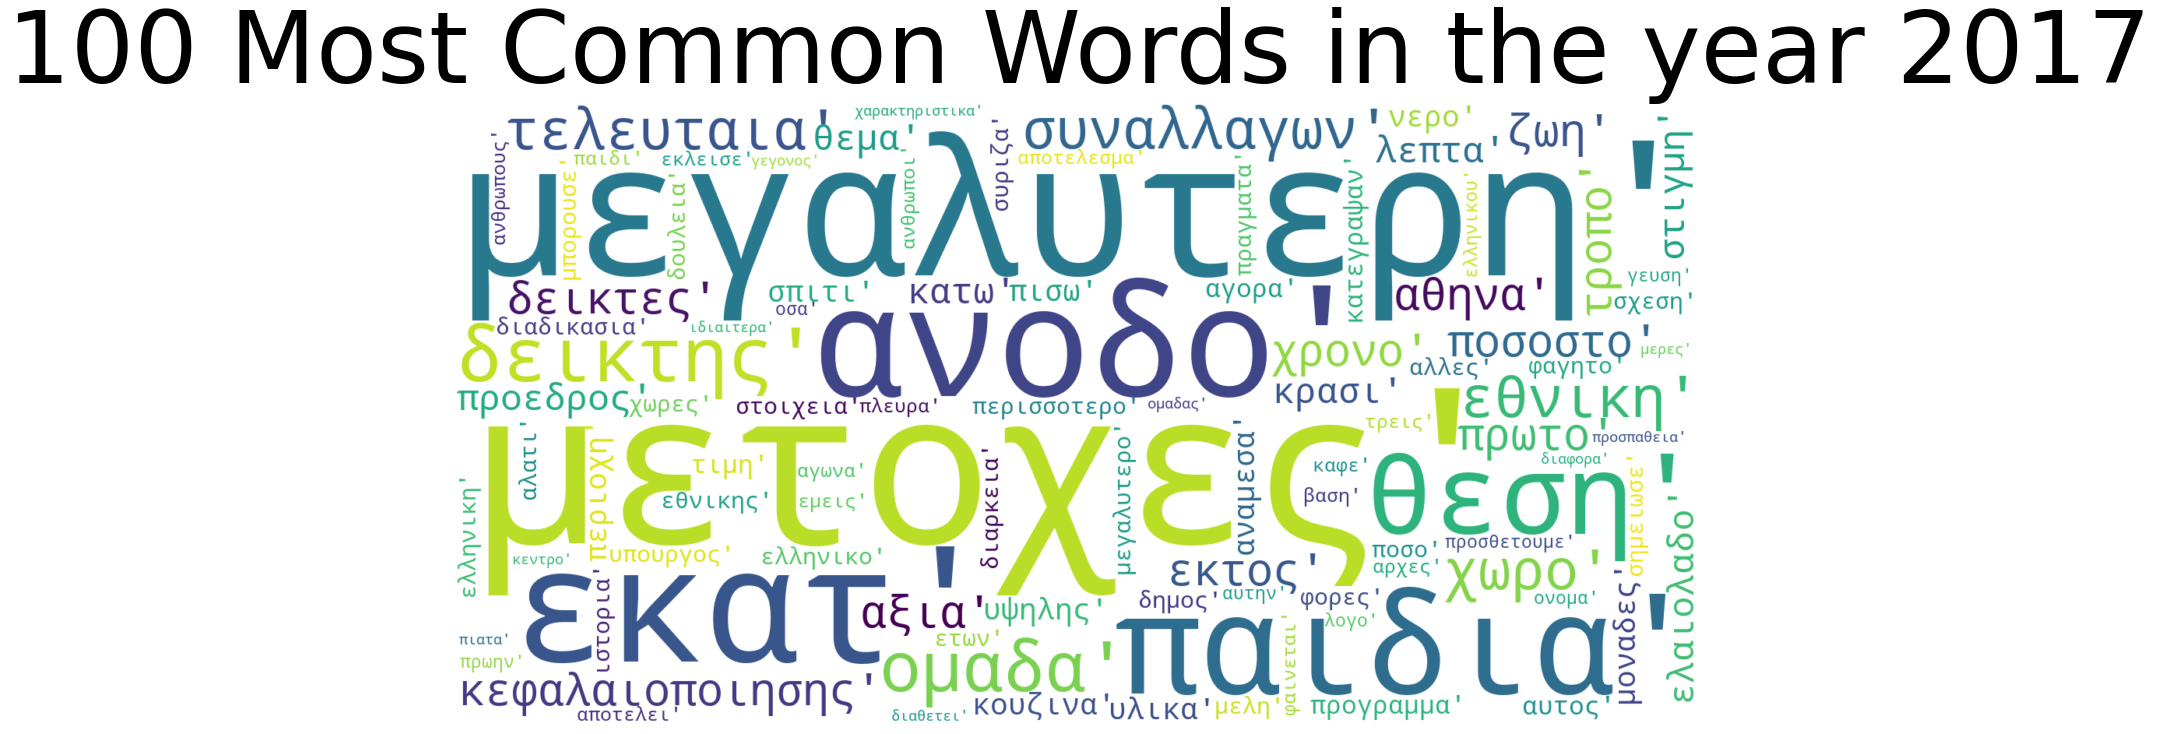

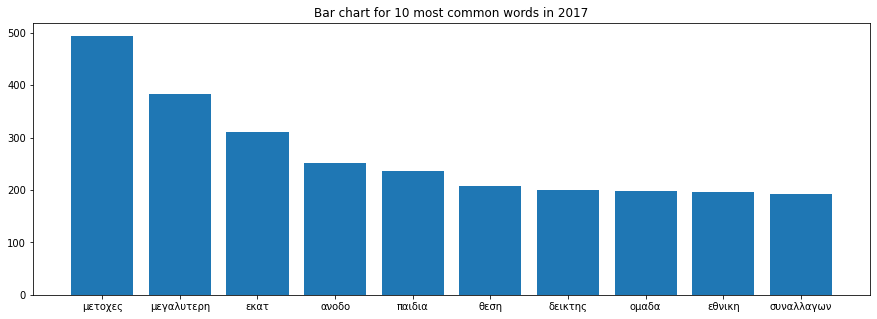

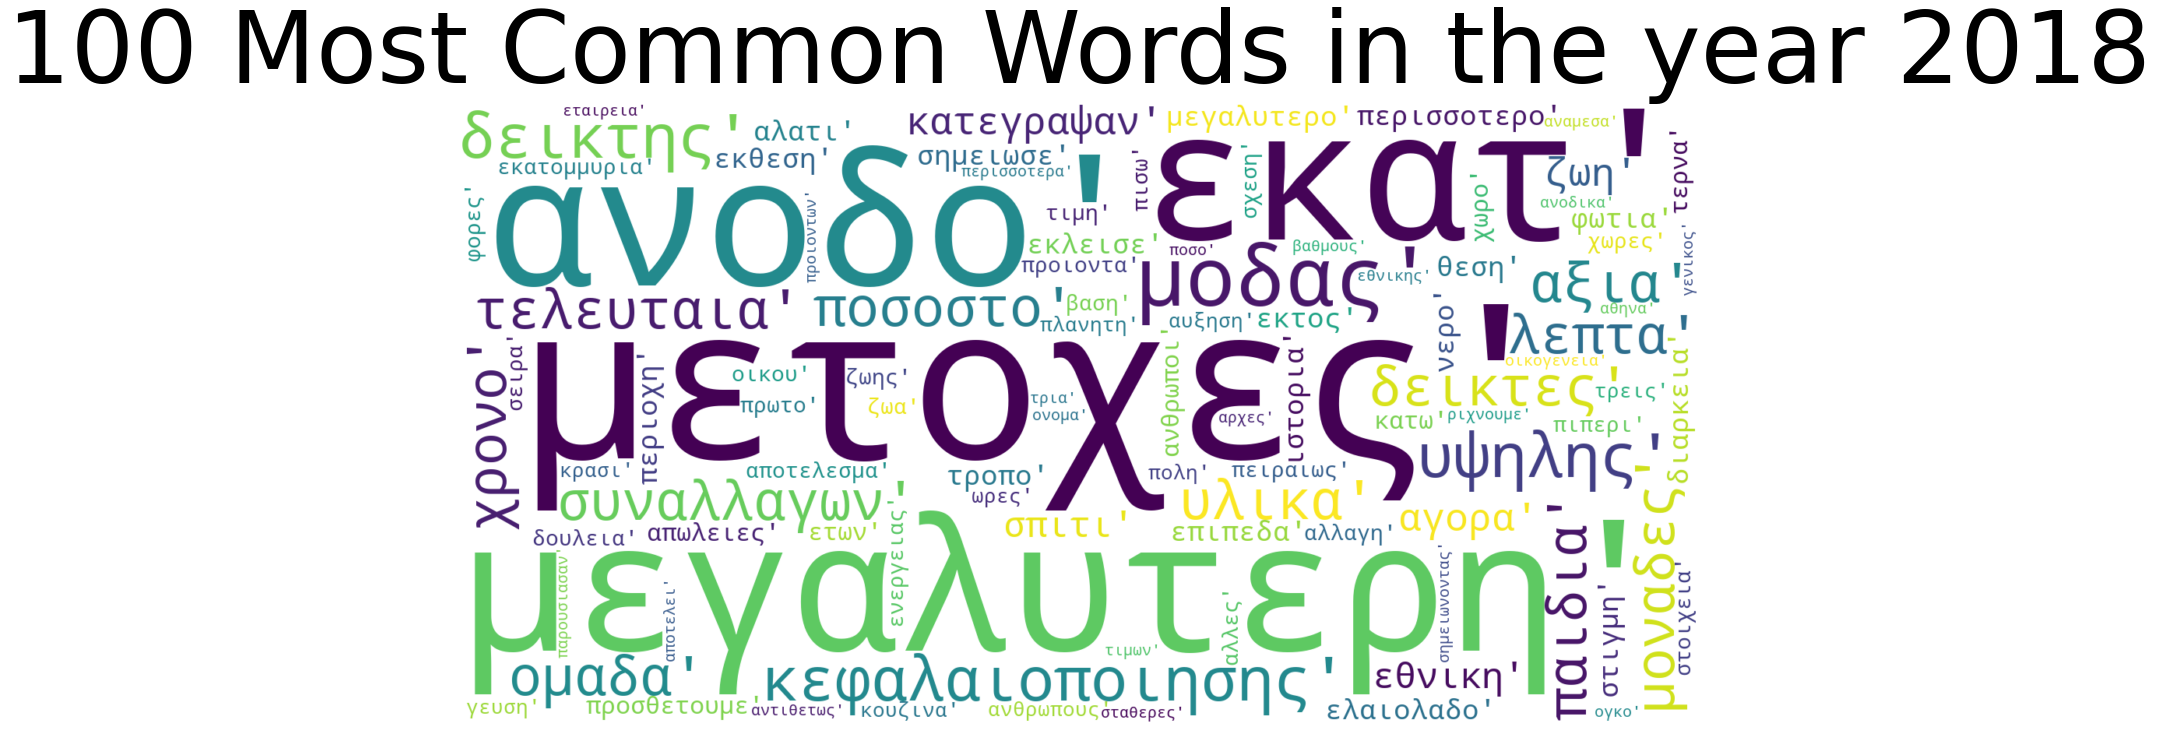

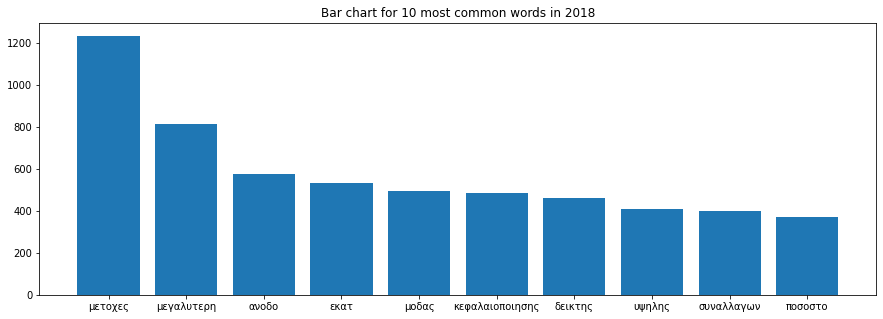

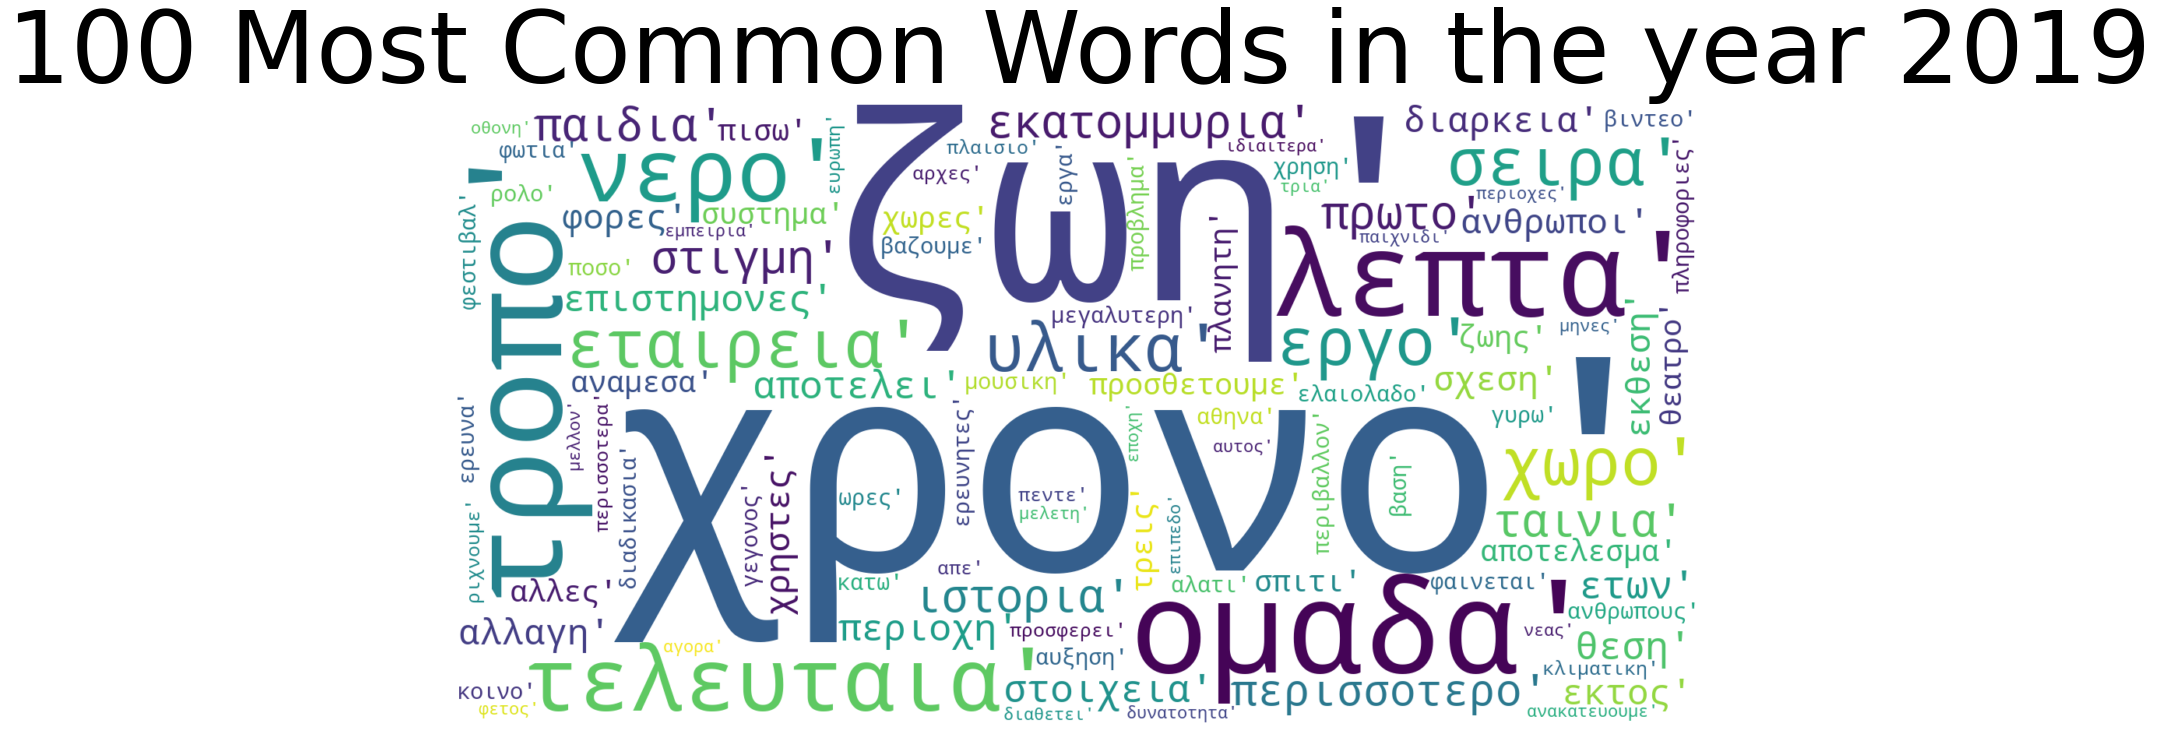

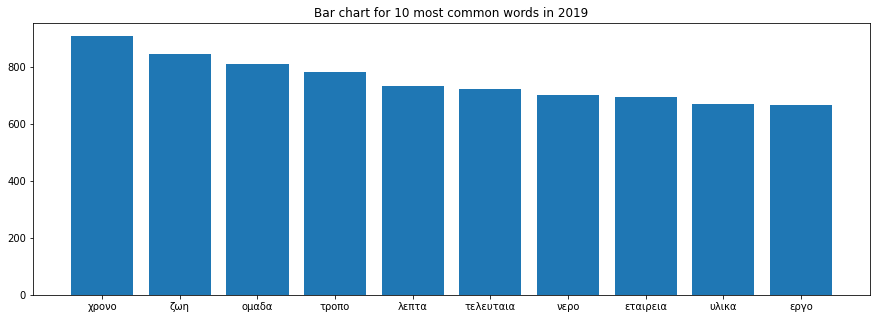

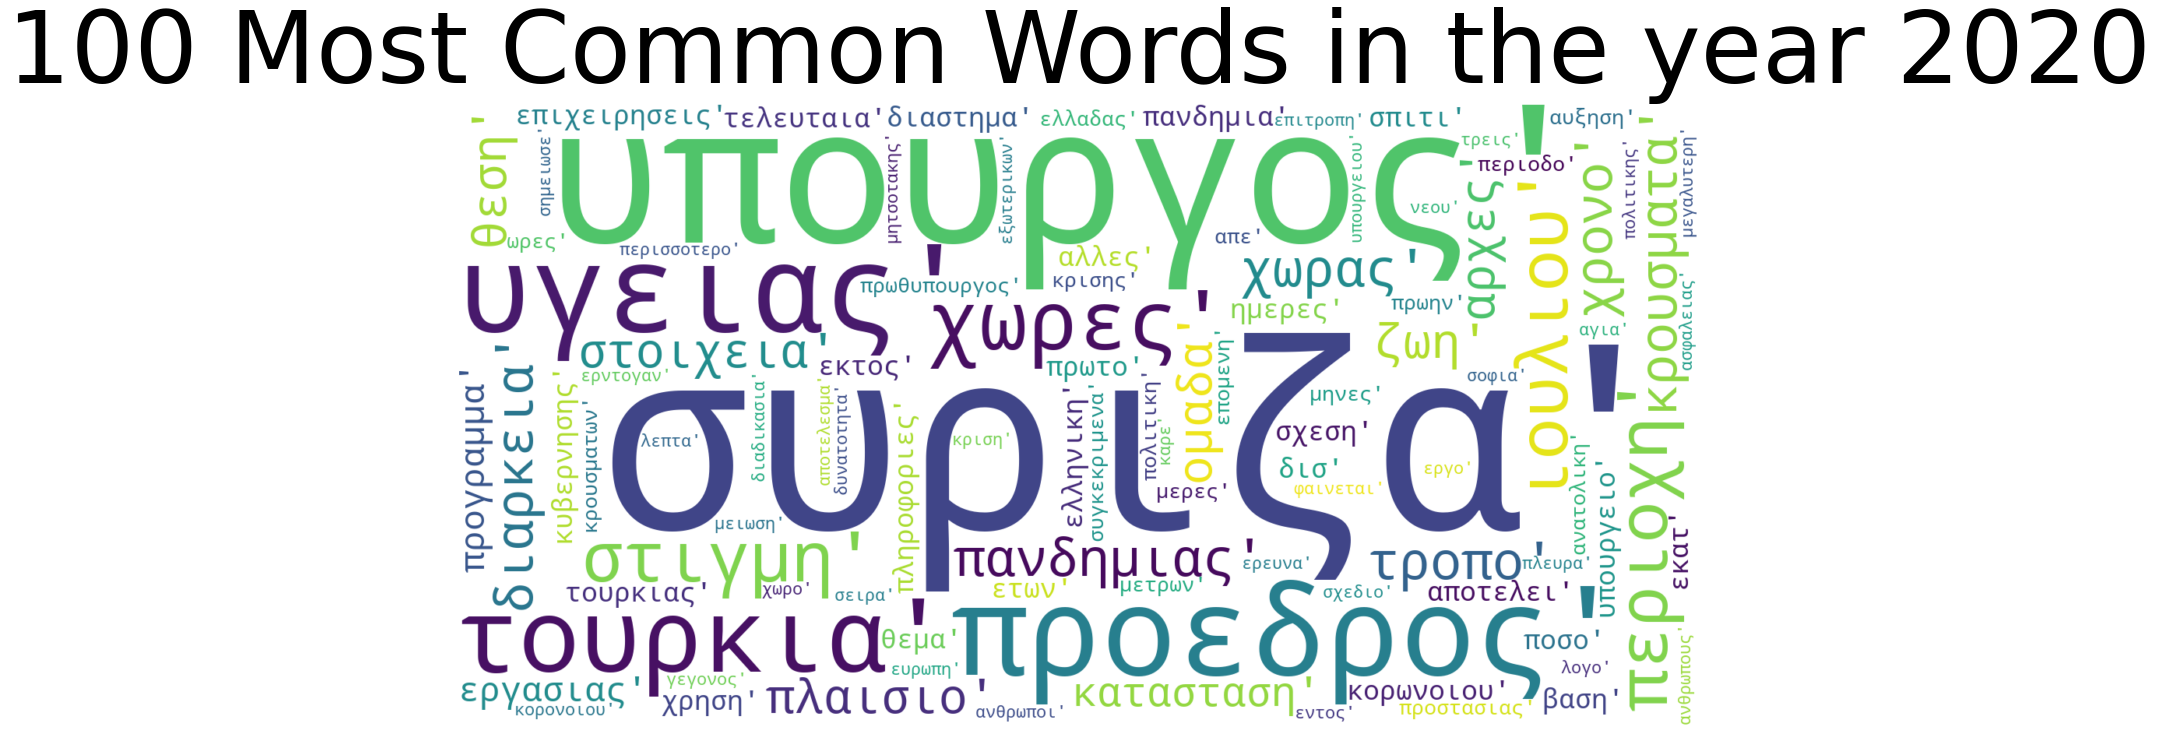

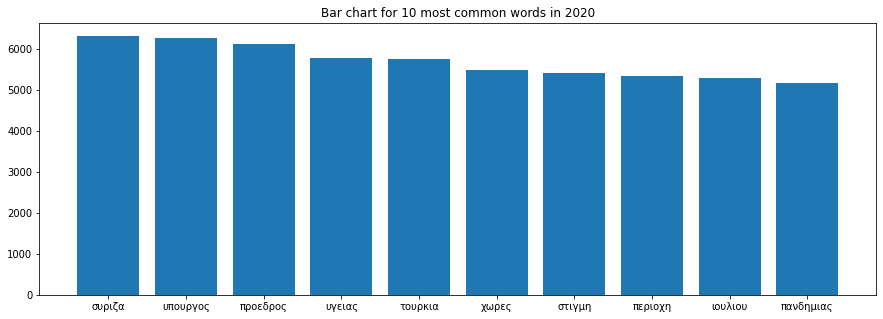

In [ ]:
#cloud words 
for i in range(2013,2021):
    words_combined = common_year(str(i))
    plot_cloud(words_combined,str(i))
    print('')
    plot_barchart(words_combined,str(i))
    print('')